# Modeling wine quality based on physicochemical tests - red wine

#### This notebook contains analysis on red wine. White wine analysis is identical and can be found in a separate notebook.

#### Our aim is to test various machine learning models and their parameters to figure out which one is best for predicting the quality rating of wine. 

#### We will also try to determine the features that affect the quality of wine the most.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
%matplotlib inline

#### We are working with 2 datasets, one containing data about red wine, the other about white wine. Since training the models on a merged dataset produced considerably worse results, we will keep them separate. 

# Red Wine

### Data analysis

In [2]:
# reading data

df_red = pd.read_csv('winequality-red.csv',sep=";")
df_red['type'] = 'red'

In [3]:
# dataframe
df_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


#### Here we see that our dataset has 13 columns, 11 of which describe the physicochemical attributes of wines, 1 representing the type of wine (white/red) and 1 representing the mean quality rating provided by at least 3 different experts. There are no missing values.

In [4]:
# data information (names of columns, numbers of instances in each column, datatype)
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [5]:
# size of the dataframe

df_red.shape

(1599, 13)

In [6]:
# some statistics on the data

df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### As we can see, there are significantly more instances with 5 and 6 quality points compared to other ratings. The data is imbalanced. Also, there are no wines rated very bad (1, 2) or very good (9, 10).

In [7]:
# number of instances per quality value

df_red.quality.value_counts().sort_values(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

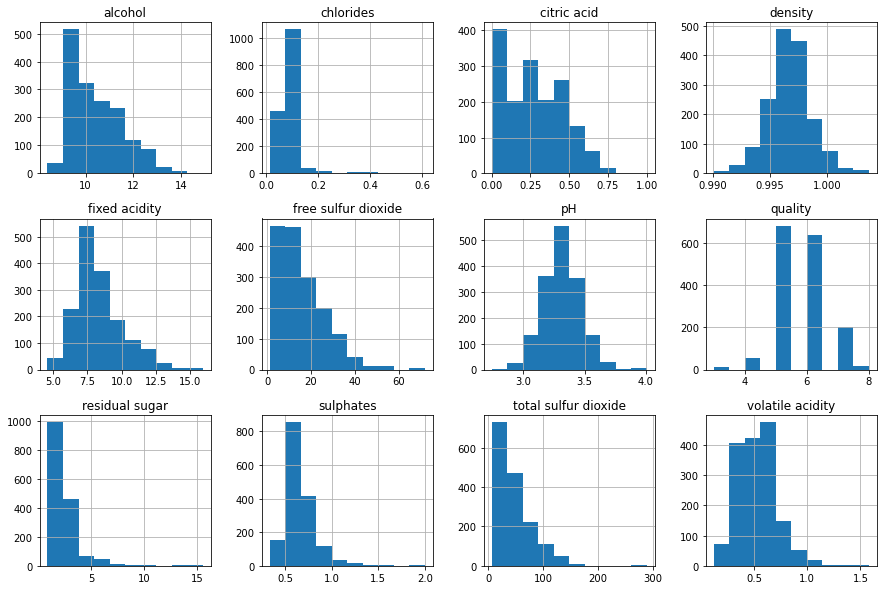

In [8]:
df_red.hist(layout=(3,4), figsize=(15,10))

plt.show()

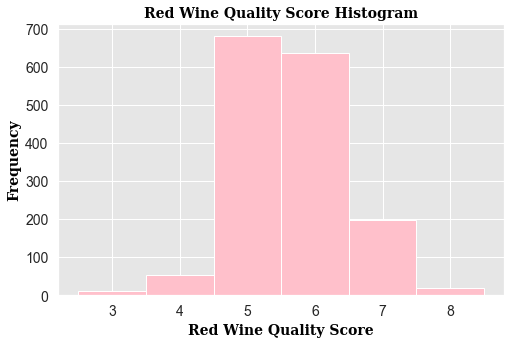

In [9]:
# Red Wine Quality Score Histogram

font_black = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

sns.set()

x_data = set(df_red.quality.values)

f, ax = plt.subplots(figsize=(8,5));

ax.set_facecolor((.9, .9, .9));

plt.hist(df_red.quality, color='pink',bins=np.arange(3,8+2)-.5);
plt.xlabel("Red Wine Quality Score",fontdict=font_black);
plt.ylabel("Frequency",fontdict=font_black);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Red Wine Quality Score Histogram",fontdict=font_black);

#### There seem to be no significant correlations when it comes to wine quality. The strongest positive correlation there is alcohol content.

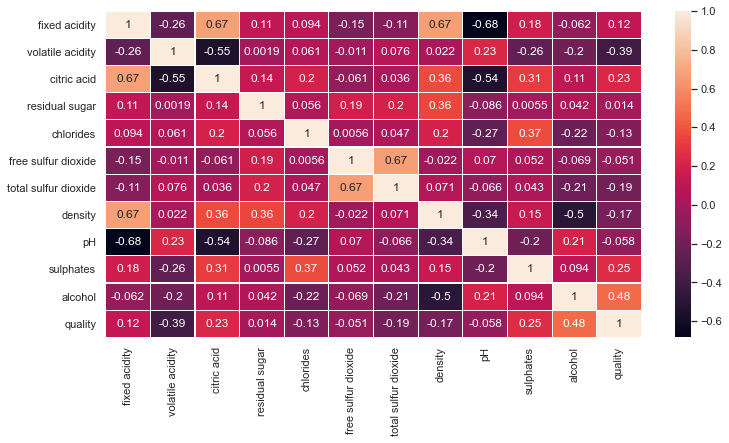

In [10]:
# pairwise correlations of columns

plt.figure(figsize=(12,6))
sns.heatmap(df_red.corr(), annot=True, linewidths = 0.2);

## Classification

In [11]:
# function to train and predict data

def run_model(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train) # training the model
    
    y_pred = model.predict(X_test) # predicting data
    
    acc = accuracy_score(y_test,y_pred) # accuracy score
    
    #result = confusion_matrix(y_test, y_pred) # confusion matrix
    
    #print(result)
    return acc  # return accuracy

In [12]:
# splitting data into test and training sets

X_train, X_test, y_train, y_test = train_test_split(df_red.drop(columns=['type','quality']),\
                                                    df_red['quality'], test_size = 0.2, random_state=1)

# a new dataframe for storing all the results
results = pd.DataFrame(columns = ['name', 'accuracy score']) 

In [13]:
new_y_train = y_train
new_y_train = new_y_train.replace(3,4)
new_y_train = new_y_train.replace(8,7)

new_y_test = y_test
new_y_test = new_y_test.replace(3,4)
new_y_test = new_y_test.replace(8,7)

### K nearest neighbors

#### With K-nearestneighbor classifier we get 0.57 accuracy score with 28 nearest neighbors

In [14]:
# Searching for max accuracy

max_acc = -1
k_max = -1
acc_list = {'euclidean':[],'manhattan':[]}

for k in range(10,50):
    for m  in ['euclidean','manhattan']:
        
        knb = KNeighborsClassifier(n_neighbors=k,metric=m)
    
        acc = run_model(knb,X_train, X_test, y_train, y_test)
        acc_list[m].append(acc)
        
        if acc > max_acc :
            max_acc = acc
            k_max  = k
  
    
    
print("Highest KNN accuracy: " + str(max_acc) + "; K = " + str(k_max))

results = results.append({'name' : "KNN N=" + str(k_max), 'accuracy score' : max_acc},  
                         ignore_index = True)

Highest KNN accuracy: 0.571875; K = 28


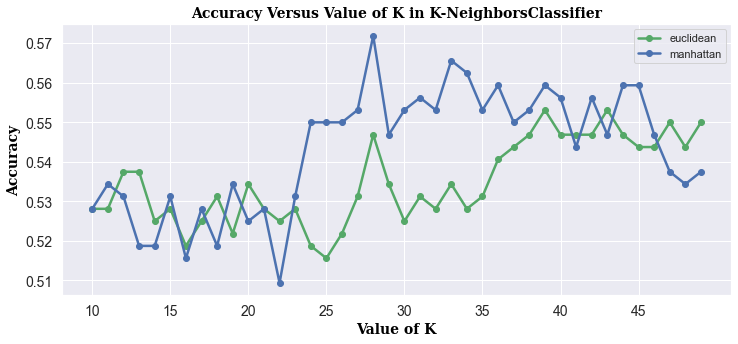

In [15]:
# plotting accuracy 

fig , ax1 = plt.subplots(figsize=(12, 5))

plt.xlabel("Value of K",fontdict=font_black);
plt.ylabel("Accuracy",fontdict=font_black);

ax1.plot(range(10,50), acc_list['euclidean'] , color='g',linewidth=2.5,marker='o')
ax1.plot(range(10,50), acc_list['manhattan'] , color='b',linewidth=2.5,marker='o')

plt.xticks(range(10,50,5) ,fontsize=14)

plt.yticks(fontsize=14);
plt.title("Accuracy Versus Value of K in K-NeighborsClassifier",fontdict=font_black);
plt.legend(['euclidean','manhattan'])
plt.show()

#### Trying out KNN for the second time, this time scaling the data first.

In [16]:
# Scaling 

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


# scaled data put into a dataframe so it would be easier to see how the values were changed
df_x_train_scaled = pd.DataFrame(X_train_scaled, columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                                                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                                                         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

df_x_test_scaled = pd.DataFrame(X_test_scaled, columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                                                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                                                         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [17]:
# seeing what the values look like before and after scaling

X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
701,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5
56,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0
863,7.2,0.620,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53,9.7
1387,7.4,0.640,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6
...,...,...,...,...,...,...,...,...,...,...,...
715,7.2,0.490,0.18,2.7,0.069,13.0,34.0,0.99670,3.29,0.48,9.2
905,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8
235,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0


#### Visualisation of data distribution after scaling

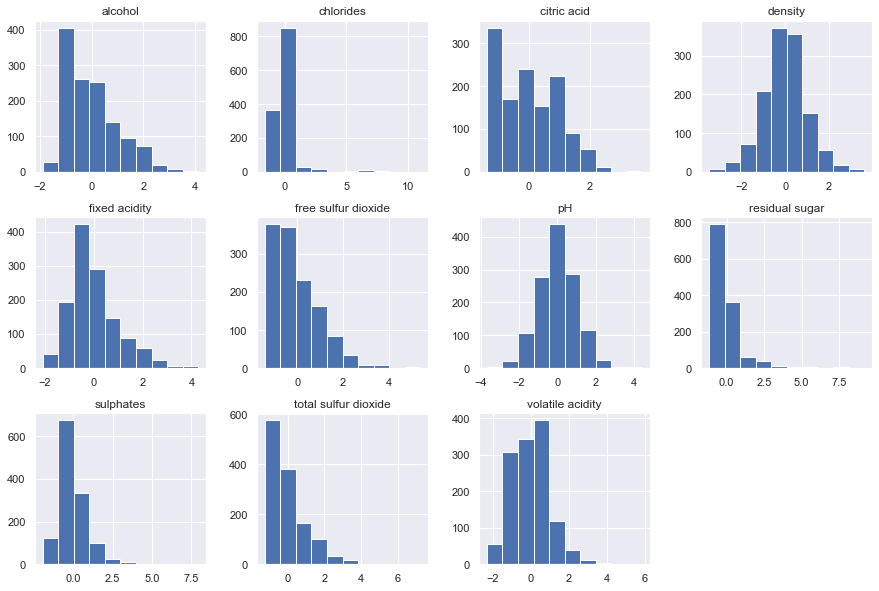

In [18]:
df_x_train_scaled.hist(layout=(3,4), figsize=(15,10))

plt.show()

In [19]:
df_x_train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.733079,0.664893,-1.257044,-0.320459,-0.453622,-0.742407,-0.645507,0.240001,0.988460,0.063095,-0.872234
1,1.067741,-0.623462,1.523148,0.608863,-0.369546,-1.125190,-1.112003,0.187899,-1.753513,-0.173904,-0.779785
2,-1.746040,-1.071585,-1.358142,-0.534917,-0.789922,1.075808,0.536281,-2.677737,2.327564,0.774090,3.287990
3,-0.620528,0.496847,-1.054849,-0.034513,-0.201396,0.118853,1.189375,0.375468,1.243528,-0.766400,-0.687335
4,-0.507977,0.608877,-1.004300,-0.534917,0.261018,-0.742407,-0.707707,-0.333126,-0.095575,-0.470152,-0.779785
...,...,...,...,...,...,...,...,...,...,...,...
1274,-0.620528,-0.231354,-0.448261,0.108459,-0.390565,-0.263930,-0.365610,-0.020511,-0.159342,-1.062648,-1.149582
1275,0.504985,0.272785,-0.347163,0.322918,-0.138340,-0.072539,2.153466,0.656821,-0.541943,-0.410902,-0.872234
1276,-0.958182,1.085008,-0.903202,2.110074,0.618337,-0.646712,-0.894305,-0.098665,0.223259,-1.003399,0.329609
1277,-0.620528,0.552862,-1.358142,-0.463431,0.197961,-0.168234,-0.241211,0.005540,0.350792,-0.470152,-1.334481


In [20]:
# calculating the accuracy after scaling

max_acc = -1
k_max = -1
acc_list = {'euclidean':[],'manhattan':[]}

for k in range(10,50):
    for m  in ['euclidean','manhattan']:
        
        knb = KNeighborsClassifier(n_neighbors=k,metric=m)
        acc = run_model(knb,X_train_scaled, X_test_scaled, y_train, y_test)
        acc_list[m].append(acc)

        if acc > max_acc :
            max_acc = acc
            k_max=k
        

print("Highest KNN accuracy with scaled data: " + str(max_acc) + "; K = " + str(k_max))

results = results.append({'name' : "KNN scaled N=" + str(k_max), 'accuracy score' : max_acc},  
                         ignore_index = True)

Highest KNN accuracy with scaled data: 0.65; K = 31


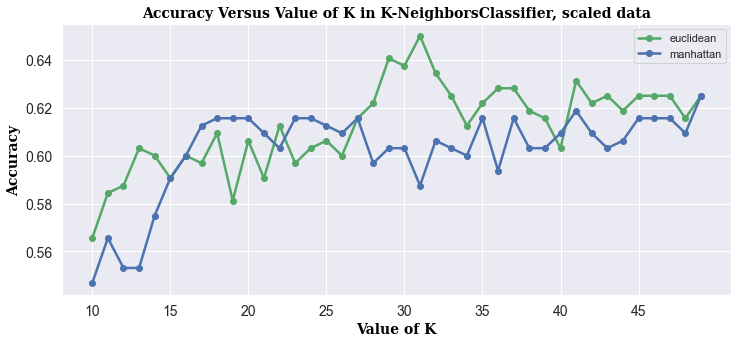

In [21]:
# plotting accuracy 

fig , ax1 = plt.subplots(figsize=(12, 5))
plt.xlabel("Value of K",fontdict=font_black);
plt.ylabel("Accuracy",fontdict=font_black);

ax1.plot(range(10,50), acc_list['euclidean'] , color='g',linewidth=2.5,marker='o')
ax1.plot(range(10,50), acc_list['manhattan'] , color='b',linewidth=2.5,marker='o')

plt.xticks(range(10,50,5) ,fontsize=14)
plt.yticks(fontsize=14);
plt.title("Accuracy Versus Value of K in K-NeighborsClassifier, scaled data",fontdict=font_black);

plt.legend(['euclidean','manhattan'])
plt.show()

#### From this we can see that KNN works a bit better on scaled data (accuracy 0.575 vs 0.65).

### Decision Tree

In [22]:
dt = DecisionTreeClassifier(random_state = 42)

results = results.append({'name' : "DTC", 'accuracy score' : run_model(dt,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

### Random Forest Classifier 

In [23]:
rf = RandomForestClassifier(n_estimators = 600, random_state = 42)

results = results.append({'name' : "RandomForestClassifier n = 600", 'accuracy score' : run_model(rf,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

### Support Vector Classification

In [24]:
svc = SVC(kernel='rbf',gamma='auto',random_state = 42)

results = results.append({'name' : "SVC kernel = rbf; gamma = auto", 'accuracy score' : run_model(svc,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

In [25]:
svc = SVC(kernel='poly',random_state = 42)

results = results.append({'name' : "SVC kernel = poly; gamma = auto", 'accuracy score' : run_model(svc,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

In [26]:
svc = SVC(kernel='linear',random_state = 42)

results = results.append({'name' : "SVC kernel = linear; gamma = auto", 'accuracy score' : run_model(svc,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

In [27]:
results

,name,accuracy score
0,KNN N=28,0.571875
1,KNN scaled N=31,0.650000
2,DTC,0.643750
3,RandomForestClassifier n = 600,0.721875
4,SVC kernel = rbf; gamma = auto,0.609375
5,SVC kernel = poly; gamma = auto,0.531250
6,SVC kernel = linear; gamma = auto,0.596875


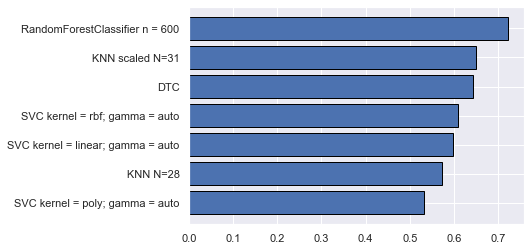

In [28]:
results.sort_values(by = 'accuracy score',inplace=True)
plt.barh(results['name'],results['accuracy score'],edgecolor ='black')
plt.show()

### The best accuracy score we can get so far is 0.72 with model of Random Forest classifier with 600 estimator

## Cross Validation with Random Forest

In [29]:
cv = KFold(n_splits=5 , random_state=42, shuffle=True)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.65625    0.72265625 0.6875     0.6875     0.63529412]
mean score: 0.6778400735294118


In [30]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.72265625 0.7109375  0.640625   0.703125   0.62745098 0.66796875
 0.6953125  0.6796875  0.6640625  0.68627451 0.70703125 0.61328125
 0.671875   0.7265625  0.65490196]
mean score: 0.6781168300653594


We have tried to find parameters which give the best accuracy scores

In [31]:
param_grid ={'bootstrap': [True, False],
 'max_depth': [10, 15, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [500,600]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [500, 600]},
             verbose=3)

In [32]:
best_params = grid.best_params_
print(best_params)
best_score = grid.best_score_
print(best_score)
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 
'min_samples_split': 5, 'n_estimators': 1100}
best_score = .68

{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}
0.6716198832338293


#### With parameters above the best accuracy score we can get is 0.67

### Regression

#### At this point we applied Regression to train the data and according to the results. Regression is more accurate with the data.

In [33]:
def run_reg_model(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test,y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    
    return (r2,mse)

In [34]:
lr = LinearRegression()
r2 , mse = run_reg_model(lr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.3266402726986821 0.3830719815814284


In [35]:
svr = SVR(kernel = 'linear',gamma='auto')
r2 , mse = run_reg_model(svr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.32534380766349535 0.3838095359820613


In [36]:
rf = RandomForestRegressor(n_estimators = 1001, random_state = 42)
r2 , mse = run_reg_model(rf,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.43934498766534813 0.3189546654644057


In [37]:
lasso  = Lasso(alpha=0.001)
r2 , mse = run_reg_model(lasso ,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.3322760215759383 0.37986582385833706


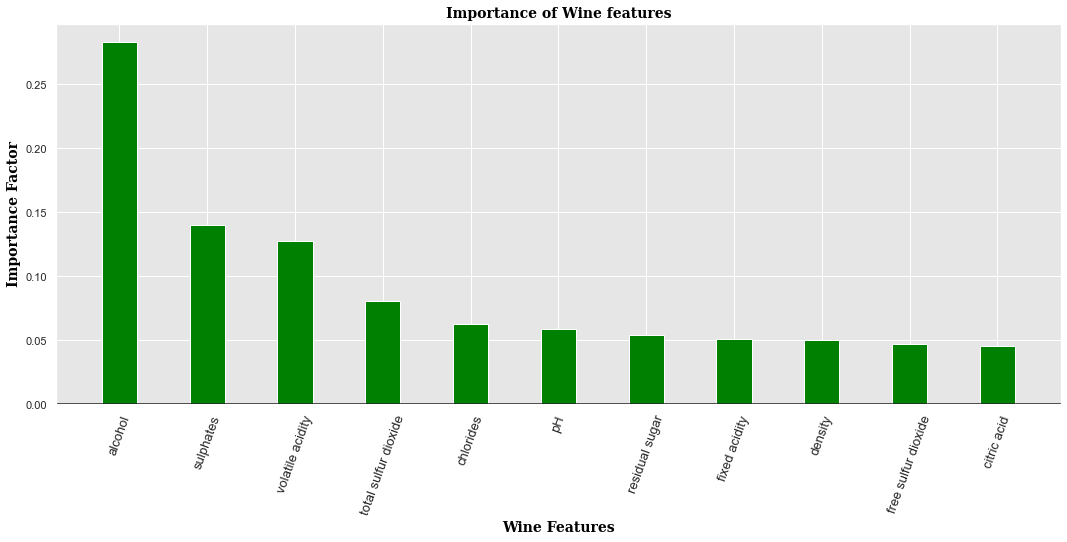

In [38]:
# most releated features(column)

important_feature = pd.DataFrame(columns=['feature','Importance_factor'])
important_feature['feature'] = X_train.columns
important_feature['Importance_factor'] = rf.feature_importances_
important_feature.sort_values(by='Importance_factor',ascending=False,inplace=True)


f, ax = plt.subplots(figsize=(18,7))
ax.set_facecolor((.9, .9, .9)) 
x_data = important_feature.feature
y_data = important_feature.Importance_factor
x_pos = list(range(len(x_data)))


plt.bar(x_data,y_data, color="green",width=.4)
plt.xticks(x_pos,x_data,fontsize=13,rotation=70);
plt.title("Importance of Wine features",fontdict=font_black)
plt.xlabel("Wine Features",fontdict=font_black,)
plt.ylabel("Importance Factor",fontdict=font_black)
plt.axhline(0, color='black');